In [1]:
import networkx
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import *
from torch_geometric.loader import NeighborSampler, NeighborLoader
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GATConv, ResGatedGraphConv, GATv2Conv, SAGEConv, GENConv, DeepGCNLayer, PairNorm, GINConv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import torch.nn.functional as F
from imblearn.under_sampling import RandomUnderSampler
pd.options.mode.use_inf_as_na = True
from collections import Counter
from sklearn.feature_selection import SelectFromModel
import torch.nn as nn
import time
import pickle
from torch.nn import LayerNorm, Linear, ReLU
from torch_scatter import scatter
from tqdm import tqdm
from torch_geometric.loader import RandomNodeSampler
import math
import copy
from sklearn.metrics import f1_score
from torch.optim import lr_scheduler
from sklearn.manifold import TSNE

In [2]:
import warnings
# action参数可以设置为ignore，一位一次也不喜爱你是，once表示为只显示一次
warnings.filterwarnings(action='ignore')

In [3]:
np.random.seed(2022)
torch.manual_seed(2022)

In [4]:
train_data = torch.load('cic2017_directed_line_graph_train_data_15label')

In [5]:
test_data = torch.load('cic2017_directed_line_graph_test_data_15label')

In [6]:
test_embedded = TSNE(n_components=2).fit_transform(test_data.x.numpy())

In [7]:
test_embedded

array([[ -3.700375 ,  48.03767  ],
       [  5.59664  ,   9.3656645],
       [-11.249031 , -24.49815  ],
       ...,
       [ -4.425309 , -72.90824  ],
       [-15.312756 , -49.119545 ],
       [ -5.3772035,   3.615296 ]], dtype=float32)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Org data dimension is 200. Embedded data dimension is 2


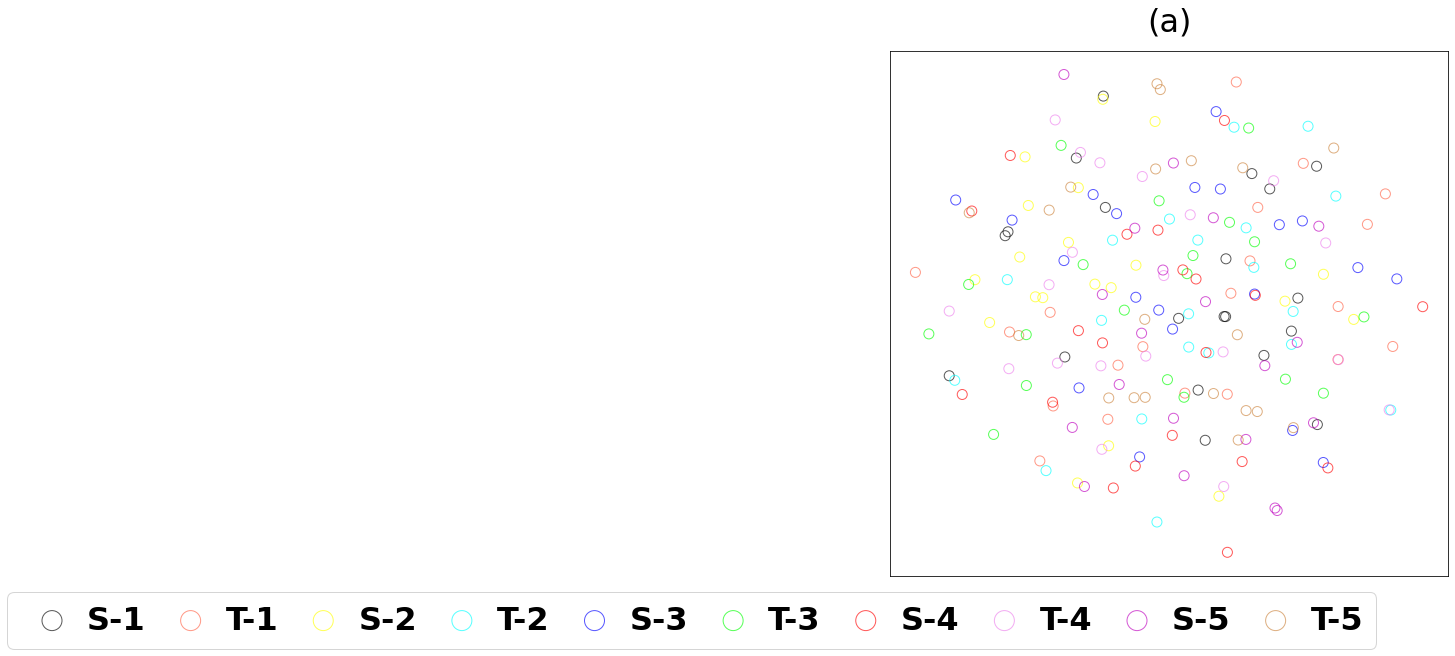

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import pandas as pd


S_X1=np.random.random((200,200))#原始特征

class_num=10  
#####生成标签
y_s=np.zeros((20*class_num))
for i in range(20* class_num):
    y_s[i] = i // 20
###################

maker=['o','v','^','s','p','*','<','>','D','d','h','H']#设置散点形状
colors = ['black','tomato','yellow','cyan','blue', 'lime', 'r', 'violet','m','peru','olivedrab','hotpink']#设置散点颜色

Label_Com = ['S-1', 'T-1', 'S-2', 'T-2', 'S-3',
             'T-3', 'S-4', 'T-4','S-5','T-5', 'S-6', 'T-6', 'S-7','T-7','S-8', 'T-8','S-9','T-9',
             'S-10','T-10','S-11', 'T-11', 'S-12','T-12'] ##图例名称

### 设置字体格式
font1 = {'family' : 'Times New Roman',

         'weight' : 'bold',
'size'   : 32,
}




def visual(X):
    tsne = manifold.TSNE(n_components=2,init='pca', random_state=501)
    X_tsne = tsne.fit_transform(X)

    print("Org data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

    #'''嵌入空间可视化'''
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)

    return  X_norm


def plot_with_labels(S_lowDWeights,Trure_labels,name):
    plt.cla()#清除当前图形中的当前活动轴,所以可以重复利用

    # 降到二维了，分别给x和y
    True_labels=Trure_labels.reshape((-1,1))
    
    S_data=np.hstack((S_lowDWeights,True_labels))
    S_data=pd.DataFrame({'x':S_data[:,0],'y':S_data[:,1],'label':S_data[:,2]})



    for index in range(class_num):
        X= S_data.loc[S_data['label'] == index]['x']
        Y=S_data.loc[S_data['label'] == index]['y']
        plt.scatter(X,Y,cmap='brg', s=100, marker=maker[0], c='', edgecolors=colors[index],alpha=0.65)

    plt.xticks([])  # 去掉横坐标值
    plt.yticks([])  # 去掉纵坐标值
    #
    plt.title(name,fontsize=32,fontweight='normal',pad=20)




fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
plot_with_labels(visual(S_X1),y_s,'(a)')


plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None,
                wspace=0.1, hspace=0.15)
plt.legend(scatterpoints=1,labels = Label_Com, loc='best',labelspacing=0.4,columnspacing=0.4,markerscale=2,bbox_to_anchor=(0.9, 0),ncol=12,prop=font1,handletextpad=0.1)

# plt.savefig('./'+str(sour)+str(tar)+'.png', format='png',dpi=300, bbox_inches='tight')
plt.show(fig)
